# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

In [762]:
import numpy as np
import pandas as pd
import random 

import seaborn
import matplotlib.pyplot as plt

import scipy.stats as sts
import itertools

%config InlineBackend.figure_format = 'svg'

In [763]:
N = 100000

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [764]:
variants = ['ОрелОрел', 'РешкаРешка', 'ОрелРешка', 'РешкаОрел'] 

exp = pd.DataFrame(data=np.random.choice(variants, N, p=[.25, .25, .25,.25]), columns = ['experiments'])

df = exp.groupby('experiments').agg({'experiments':'count'})\
    .rename(columns = {'experiments':'cnt'}).reset_index()

df['%'] = df['cnt'] / N

df

,experiments,cnt,%
0,ОрелОрел,25091,0.25091
1,ОрелРешка,25003,0.25003
2,РешкаОрел,24838,0.24838
3,РешкаРешка,25068,0.25068


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [765]:
# 0 - решка
# 1 - орел

def flip_coin():
    
    results = []
    for _ in range(0,N):
        lst = []
        for _ in range(0,3):    
            lst.append(np.random.choice([0, 1]))
        results.append(lst)
    return results

df = pd.DataFrame(data=flip_coin(), columns = ['Flip 1', 'Flip 2', 'Flip 3'])


In [766]:
#A = {не выпало ни одного герба}

df[(df['Flip 1'] == 0) & (df['Flip 2'] == 0) & (df['Flip 3'] == 0)].shape[0] / N

0.12573

In [767]:
#B = {выпало четное число гербов}

df['sum'] = df['Flip 1'] + df['Flip 2'] + df['Flip 3']
df[df['sum'] == 2].shape[0] / N

0.37328

In [768]:
#C = {на третьей монете выпал герб}

df[df['Flip 3'] == 1].shape[0] / N

0.50024

Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [773]:
# 0 - оба были забракован
# 1 - выбран L
# 20- выбран E

def choose_candidate():
    
    results = []
    for _ in range(0,N):
        lst = []
        for _ in range(0,3):    
            lst.append(np.random.choice([0, 1, 20]))
        results.append(lst)
    return results

df = pd.DataFrame(data=choose_candidate(), columns = ['committeeMan1', 'committeeMan2', 'committeeMan3'])

df['sum'] = df['committeeMan1'] + df['committeeMan2'] + df['committeeMan3']

#A = {рекомендован L}, B = {рекомендован E}

print(df['sum'].unique())
print('')
print('рекомендован L:')
print(df[(df['sum'] == 40) | (df['sum'] == 60) | (df['sum'] == 41)].shape[0] / N)
print('')
print('рекомендован E:')
print(df[(df['sum'] == 2) | (df['sum'] == 3) | (df['sum'] == 22)].shape[0] / N)

[21  3 40 22  1  2 41 60 20  0]

рекомендован L:
0.25911

рекомендован E:
0.25992


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [774]:
def dice(n):
    return zip([random.randint(1, 6) for _ in range(n)],[random.randint(1, 6) for _ in range(n)])


def dice_sum(n):
    return [random.randint(1, 6) + random.randint(1, 6) for _ in range(n)]

In [775]:
df = pd.DataFrame(data=list(dice(N)), columns = ['Dice_1', 'Dice_2'])

print('A = {вышло две "шестерки"}')
print(df[(df['Dice_1'] == 6) & (df['Dice_2'] == 6)].shape[0] / N)

A = {вышло две "шестерки"}
0.0282


In [776]:
df = pd.DataFrame(data=dice_sum(N), columns = ['outcomes'])

print('B = {сумма выпавших очков не меньше 11}')
print(df[df['outcomes'] >=11].shape[0] / N)

B = {сумма выпавших очков не меньше 11}
0.08337


In [777]:
df = pd.DataFrame(data=list(dice(N)), columns = ['Dice_1', 'Dice_2'])

print('C = {не выпала ни одна "шестерка"}')
print(df[(df['Dice_1'] != 6) & (df['Dice_2'] != 6)].shape[0] / N)

C = {не выпала ни одна "шестерка"}
0.69552


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [778]:
print('D = {выпала хотя бы одна шестёрка}')
print(df[(df['Dice_1'] == 6) | (df['Dice_2'] == 6)].shape[0] / N)

D = {выпала хотя бы одна шестёрка}
0.30448


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [779]:
def digits(n):
    return zip([random.randint(0, 9) for _ in range(n)],
               [random.randint(0, 9) for _ in range(n)],
               [random.randint(0, 9) for _ in range(n)]
              )

In [780]:
df = pd.DataFrame(data=list(digits(N)), columns = ['d8', 'd9', 'd10'])

In [781]:
print('A = {Стерлись различные цифры}')
print(df[(df['d8'] != df['d9']) & (df['d9'] != df['d10']) & (df['d8'] != df['d10'])].shape[0] / N)

A = {Стерлись различные цифры}
0.71943


In [782]:
print('B = {Стерлись одинаковые цифры}')
print(df[(df['d8'] == df['d9']) & (df['d9'] == df['d10']) & (df['d8'] == df['d10'])].shape[0] / N)

B = {Стерлись одинаковые цифры}
0.00974


In [783]:
print('C = {Среди стершихся цифр хотя бы две совпадают}')
print(df[(df['d8'] == df['d9']) | (df['d9'] == df['d10']) | (df['d8'] == df['d10'])].shape[0] / N)

C = {Среди стершихся цифр хотя бы две совпадают}
0.28057


In [784]:
print('D = {Среди стершихся цифр хотя бы две различны}')
print(df[(df['d8'] != df['d9']) | (df['d9'] != df['d10']) | (df['d8'] != df['d10'])].shape[0] / N)

D = {Среди стершихся цифр хотя бы две различны}
0.99026


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

In [785]:
binomial_rv = sts.binom(100, 0.1) # 20 испытаний с вероятностью успеха 0.4

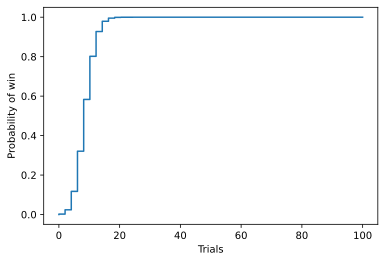

In [786]:
x = np.linspace(0,100)
cdf = binomial_rv.cdf(x) # вернёт массив из значений функции распределения
plt.step(x, cdf)
plt.ylabel("Probability of win")
plt.xlabel("Trials")
plt.plot();

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

In [787]:
n_dices = 2
dice_rolls = np.random.randint(1,7,(N, n_dices))
 

probability_scores = {i: (dice_rolls.sum(axis = 1) == i).sum() / 
                      dice_rolls.shape[0] for i in range(2,13)}


In [788]:
dice_rolls

array([[6, 5],
       [2, 3],
       [2, 4],
       ...,
       [6, 3],
       [6, 3],
       [2, 3]])

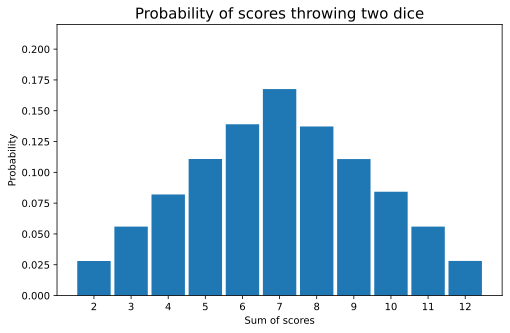

In [789]:
plt.figure(figsize=(8,5))
plt.title('Probability of scores throwing two dice', fontsize=15, loc='center')
plt.xlabel('Sum of scores')
plt.ylabel('Probability')
plt.ylim(0.0, 0.22)
plt.bar(probability_scores.keys(), probability_scores.values(), width=0.9)
plt.xticks(range(2,13))
plt.show()

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [790]:
card_list_one = []
card_list_two = []
for _ in range(0, N):
    deck = list(itertools.product(range(1,14),['Spade','Heart','Diamond','Club']))
    card_one = random.choice(deck)
    deck.remove(card_one)
    card_two = random.choice(deck)
    
    card_list_one.append(card_one)
    card_list_two.append(card_two)
    
df = pd.DataFrame(data = card_list_one, columns = ['1_num', '1_suit'])
df[['2_num', '2_suit']] = card_list_two
df = df.astype({'1_num':'str', '2_num':'str'})
df['first_draw'] = df['1_num'] + '-' + df['1_suit']
df['second_draw'] = df['2_num'] + '-' + df['2_suit']
df = df[['first_draw','second_draw']]

In [791]:
#Найти вероятность того, что первой картой была шестерка
print(df[(df['first_draw'] == '6-Spade') | (df['first_draw'] == '6-Heart') 
   | (df['first_draw'] == '6-Diamond') | (df['first_draw'] == '6-Club')].shape[0] / N)

#, а второй — семерка.

print(df[(df['second_draw'] == '7-Spade') | (df['second_draw'] == '7-Heart') 
   | (df['second_draw'] == '7-Diamond') | (df['second_draw'] == '7-Club')].shape[0] / N)


0.07729
0.07942


In [792]:
#Найти вероятность того, что первой картой была шестерка
print(df[df['first_draw'] == '6-Diamond'].shape[0] / N)

#, а второй — семерка.

print(df[df['second_draw'] == '7-Diamond'].shape[0] / N)



0.01952
0.01962


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [793]:
def extract_ball():
    balls = ['w', 'w', 'b', 'b', 'b']
    ball_one = np.random.choice(balls)
    balls.remove(ball_one)
    if ball_one == 'b':
        balls.append('w')
    else:
        pass
    ball_two = np.random.choice(balls)
    
    return [ball_one, ball_two]

In [794]:
df = pd.DataFrame(data = [extract_ball() for _ in range(0, N)], columns = ['extr_one', 'extr_two'])

In [795]:
print(df[(df['extr_one'] == 'w') & (df['extr_two'] == 'w')].shape[0] / N)

0.09955
